In [79]:
import pandas as pd
import numpy as np
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from pandas_profiling import ProfileReport

In [22]:
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris

In [6]:
wine = load_wine()
wine['data']

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [7]:
wine_df = pd.DataFrame(wine['data'], columns=wine['feature_names'])
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [9]:
wine_df['Class'] = wine['target']
wine_df['Class'] = wine_df['Class'].map(dict(zip(np.unique(wine['target']), wine['target_names'])))
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2


<AxesSubplot:>

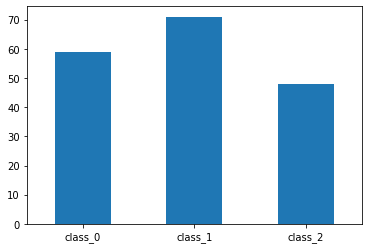

In [15]:
wine_df['Class'].value_counts(sort=False).plot.bar(rot=0, width=0.5)

<AxesSubplot:>

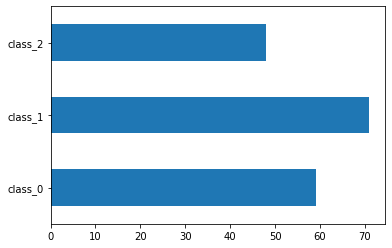

In [16]:
wine_df['Class'].value_counts(sort=False).plot.barh(rot=0, width=0.5)

<AxesSubplot:ylabel='Frequency'>

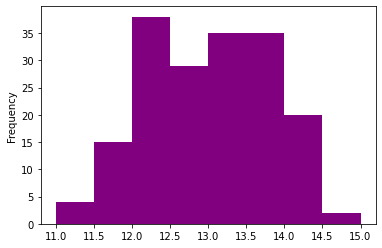

In [21]:
wine_df['alcohol'].plot.hist(bins=8, range=(11, 15), color='purple')

In [23]:
iris = load_iris()
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
iris_df['Class'] = iris['target']
iris_df['Class'] = iris_df['Class'].map(dict(zip(np.unique(iris['target']), iris['target_names'])))
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<AxesSubplot:>

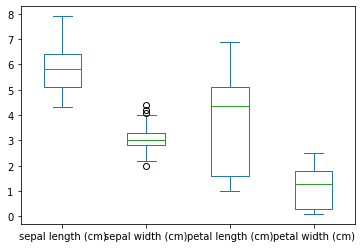

In [32]:
iris_df.iloc[:, 0:-1].plot.box(whis=1.5)

sepal width (cm)    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

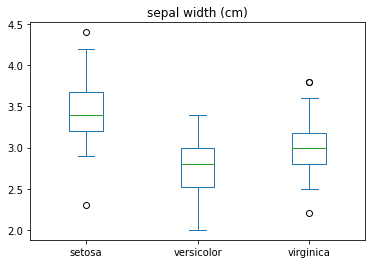

In [34]:
iris_df.loc[:, ['sepal width (cm)', 'Class']].plot.box(by='Class')

<AxesSubplot:xlabel='Class', ylabel='sepal width (cm)'>

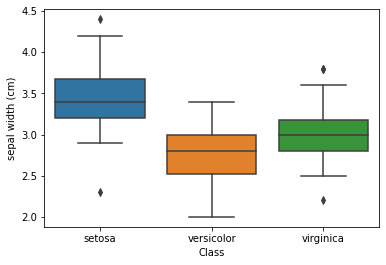

In [37]:
sns.boxplot(data=iris_df, y='sepal width (cm)', x='Class')

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

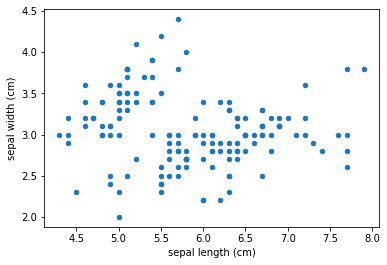

In [38]:
iris_df.plot.scatter(x='sepal length (cm)', y='sepal width (cm)')

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

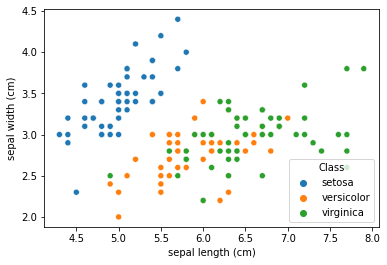

In [39]:
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='Class')

(-10.0, 10.0)

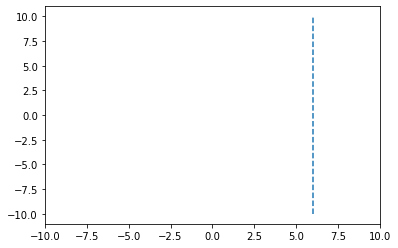

In [46]:
plt.vlines(6, -10, 10, linestyles='--')
plt.xlim(-10, 10)

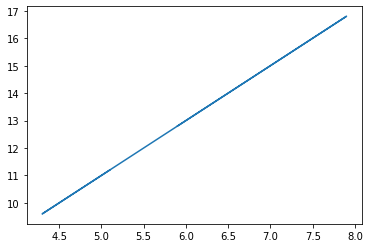

In [50]:
X = iris_df['sepal length (cm)']
plt.plot(X, 2 * X + 1)

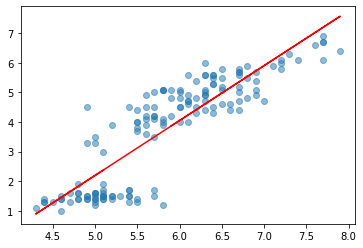

In [55]:
X, Y = iris_df['sepal length (cm)'], iris_df['petal length (cm)']
b1, b0 = np.polyfit(X, Y, 1)
plt.scatter(X, Y, alpha=0.5)
plt.plot(X, b1 * X + b0, color='red')

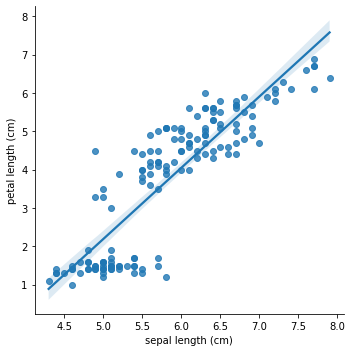

In [58]:
sns.lmplot(data=iris_df, x='sepal length (cm)', y='petal length (cm)')

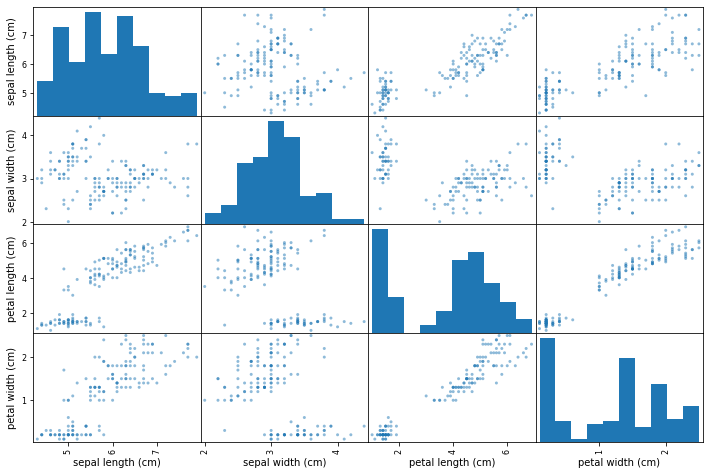

In [68]:
scatter_matrix(iris_df, figsize=(12, 8), diagonal='hist')
plt.show()

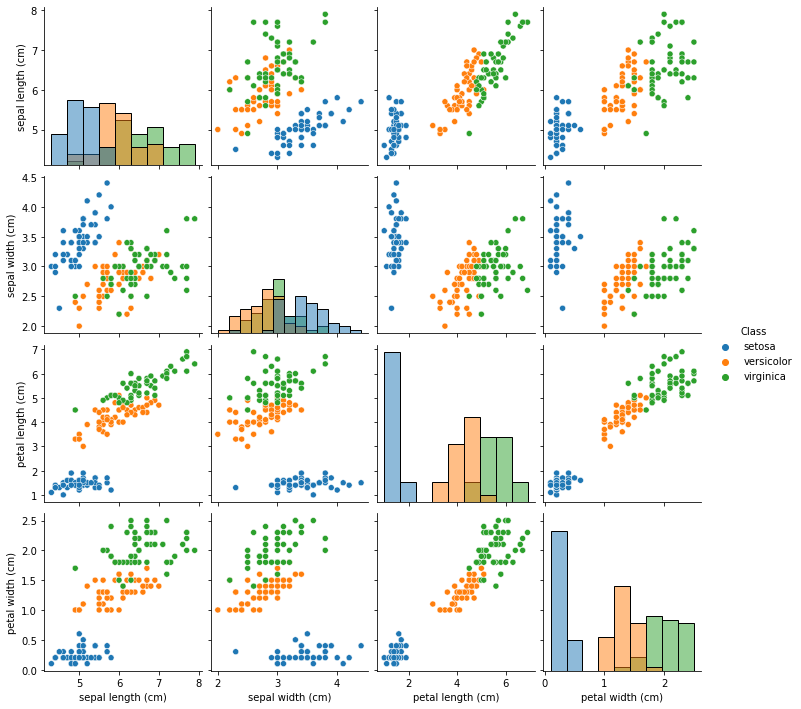

In [71]:
sns.pairplot(data=iris_df, diag_kind='hist', hue='Class')

In [72]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

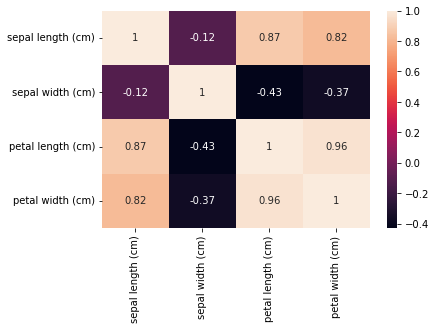

In [77]:
sns.heatmap(data=iris_df.corr(), annot=True)

In [80]:
ProfileReport(iris_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]